# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [17]:
url = "https://api.openweathermap.org/data/2.5/weather?"

# Loop counter and total to display progress
count = 0
total_cities = len(cities)

# Timer counter to prevent API rate limitation
time_count = 0

# Storage list for values to store to dataframe
valid_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    count += 1
    if time_count < 50:
        try:
            query_url = f"{url}appid={weather_api_key}&q={city}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            # Calls on JSON data for individual values will each bemade before appending to 
            # list, any missing/invalid JSON data will cause an exception, preventing 
            # uneven lists
            city_name = weather_json['name']
            valid_lat = weather_json['coord']['lat']
            valid_long = weather_json['coord']['lon']
            valid_temp = weather_json['main']['temp_max']
            valid_humid = weather_json['main']['humidity']
            valid_cloud = weather_json['clouds']['all']
            valid_speed = weather_json['wind']['speed']
            valid_country = weather_json['sys']['country']
            valid_date = weather_json['dt']
            valid_cities.append(city_name)
            lat.append(valid_lat)
            lng.append(valid_long)
            max_temp.append(valid_temp)
            humidity.append(valid_humid)
            cloudiness.append(valid_cloud)
            wind_speed.append(valid_speed)
            country.append(valid_country)
            date.append(valid_date)
            print(f'city #{count} of {total_cities}: {city} data processed')
        except:
            print(f'city #{count} of {total_cities}: {city} data unavailable')
        time_count += 1
    else:
        time.sleep(60)
        time_count = 0
        
city_data = pd.DataFrame({'City': valid_cities,
                          'Lat': lat,
                          'Long': lng,
                          'Max Temp': max_temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed,
                          'Country': country,
                          'Date': date})

city #1 of 613: thompson data processed
city #2 of 613: puerto ayora data processed
city #3 of 613: ribeira grande data processed
city #4 of 613: port-aux-francais data processed
city #5 of 613: fuvahmulah data unavailable
city #6 of 613: tura data processed
city #7 of 613: el bauga data processed
city #8 of 613: cabedelo data processed
city #9 of 613: blackmans bay data processed
city #10 of 613: ad dabbah data processed
city #11 of 613: margaret river data processed
city #12 of 613: ilhabela data processed
city #13 of 613: lethem data processed
city #14 of 613: nar'yan-mar data processed
city #15 of 613: qaqortoq data processed
city #16 of 613: longyearbyen data processed
city #17 of 613: acapulco de juarez data processed
city #18 of 613: ushuaia data processed
city #19 of 613: anadyr data processed
city #20 of 613: nalut data processed
city #21 of 613: lebu data processed
city #22 of 613: bandar lampung data processed
city #23 of 613: brookings data processed
city #24 of 613: edinbu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_data.to_csv(output_data_file)

In [19]:
city_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,288.24,88,75,4.12,CA,1689288335
1,Puerto Ayora,-0.7393,-90.3518,302.13,89,39,1.79,EC,1689288336
2,Ribeira Grande,38.5167,-28.7000,294.14,87,63,2.68,PT,1689288337
3,Port-aux-Français,-49.3500,70.2167,275.80,63,33,16.76,TF,1689288338
4,Tura,25.5198,90.2201,296.43,99,100,2.57,IN,1689288339
...,...,...,...,...,...,...,...,...,...
571,Pärnu,58.3859,24.4971,288.20,94,39,3.09,EE,1689289464
572,Zabaykal'sk,49.6333,117.3167,291.23,82,98,6.23,RU,1689289465
573,Kenai,60.5544,-151.2583,294.20,81,0,4.12,US,1689289189
574,Barguzin,53.6167,109.6167,288.78,63,24,1.89,RU,1689289467


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

### **NOTE: All further analysis will be done on one stored valid output of the code above (cities_analysis.csv) made on July 13, 2023. Re-running above code will store to output_data/cities.csv, running below code on this file will not create identical output.**

In [22]:
filepath = "cities_analysis.csv"
city_data = pd.read_csv(filepath)
city_data

,Unnamed: 0,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Jobner,26.9667,75.3833,300.83,71,100,2.43,IN,1689284112
1,1,Sechura,-5.5569,-80.8222,299.59,60,18,7.93,PE,1689284114
2,2,Port Elizabeth,-33.9180,25.5701,289.31,82,0,5.66,ZA,1689284115
3,3,Longyearbyen,78.2186,15.6401,283.06,66,40,6.17,SJ,1689284115
4,4,Vorgashor,67.5833,63.9500,278.42,64,2,2.22,RU,1689284116
...,...,...,...,...,...,...,...,...,...,...
560,560,Beruwala,6.4788,79.9828,298.69,89,20,3.72,LK,1689285231
561,561,San Buenaventura,27.0833,-101.5333,313.41,23,0,4.58,MX,1689285233
562,562,Guanare,9.0418,-69.7421,301.68,80,17,1.92,VE,1689285233
563,563,Prainha,-1.8000,-53.4800,299.53,75,82,1.20,BR,1689285234


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data['Humidity'] <= 100]
clean_city_data

,Unnamed: 0,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Jobner,26.9667,75.3833,300.83,71,100,2.43,IN,1689284112
1,1,Sechura,-5.5569,-80.8222,299.59,60,18,7.93,PE,1689284114
2,2,Port Elizabeth,-33.9180,25.5701,289.31,82,0,5.66,ZA,1689284115
3,3,Longyearbyen,78.2186,15.6401,283.06,66,40,6.17,SJ,1689284115
4,4,Vorgashor,67.5833,63.9500,278.42,64,2,2.22,RU,1689284116
...,...,...,...,...,...,...,...,...,...,...
560,560,Beruwala,6.4788,79.9828,298.69,89,20,3.72,LK,1689285231
561,561,San Buenaventura,27.0833,-101.5333,313.41,23,0,4.58,MX,1689285233
562,562,Guanare,9.0418,-69.7421,301.68,80,17,1.92,VE,1689285233
563,563,Prainha,-1.8000,-53.4800,299.53,75,82,1.20,BR,1689285234


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:xlabel='Lat', ylabel='Max Temp'>

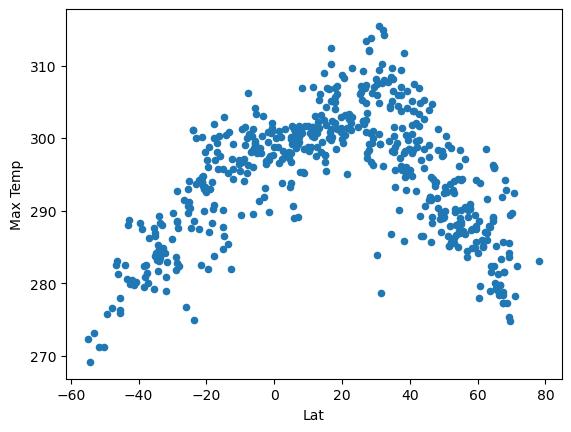

In [29]:
city_data.plot(kind='scatter', x='Lat', y='Max Temp')

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression